In [1]:
import numpy as np
import scipy.constants as con
import matplotlib.pyplot as plt
from BayesianGit.BayesianOptimiser2 import BOPackage

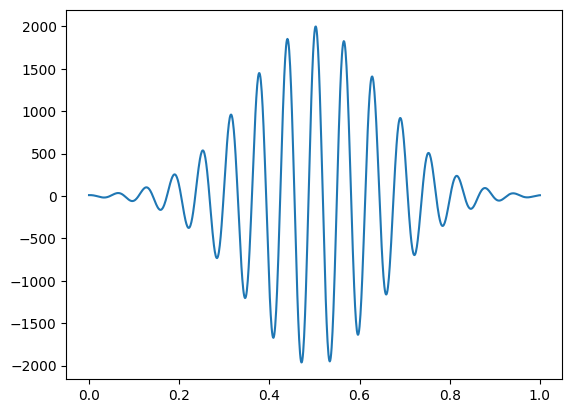

In [2]:
"""
Define the objective function.
"""

def ObjectiveFunction(x):
    x_centre = 0.5
    FWHM = 0.3
    width = FWHM / (2 * np.log(2))

    spatial_intensity =  np.exp(- ((x - x_centre) / width)**2)

    return 2000 * np.cos(100 * x) * spatial_intensity

X = np.linspace(0, 1, 1001, endpoint=True)

plt.plot(X, ObjectiveFunction(X))

In [3]:
"""
Configure the optimiser.
"""
Kernel = BOPackage.RBF_Kernel
length_scale = 0.02

AcquisitionFunction = BOPackage.UCB
max_kappa = 10
min_kappa = 0.1

bounds = np.array([[0, 1]])
n_samples = 10

log_path = '/work4/clf/david/Bayesian/Outputs/BO_Test_log_1'

# Create the object
bo = BOPackage.BO(KernelFunction=BOPackage.RBF_Kernel, 
                  length_scale=length_scale, 
                  AcquisitionFunction=BOPackage.UCB, 
                  bounds=bounds, 
                  n_samples=n_samples,
                  #log_path=log_path,
                  random_seed=78)

In [4]:
"""
Get first random batch and update the optimiser.
"""

raw_X = bo.GetRandomXBatch(batch_size=5)
raw_Y = ObjectiveFunction(raw_X)
bo.UpdateData(raw_X, raw_Y)

bo.X_data, bo.y_data

(array([[0.04818123],
        [0.68096301],
        [0.79869607],
        [0.80010859],
        [0.96529725]]),
 array([  2.6996075 , 521.23785822, -71.03173622, -29.10723381,
        -12.82265745]))

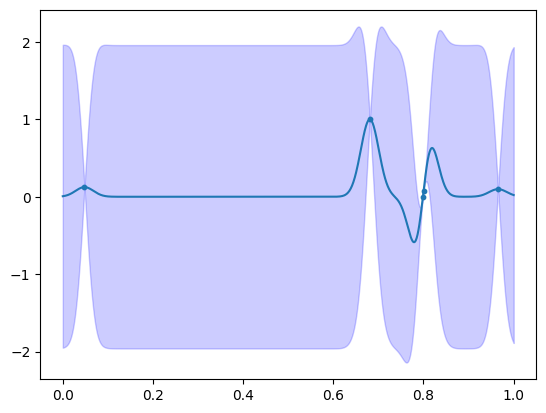

In [5]:
"""
Take a look at the mean and variance of the function now we have some data
"""

BOPackage.SausagePlot(bo)

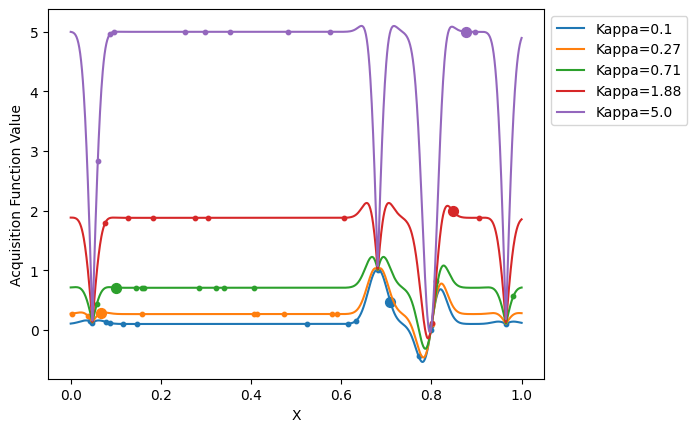

In [6]:
BOPackage.KappaAcquisitionFunctionPlot(bo, number_kappas=5, number_candidate_points=10, max_kappa=5, min_kappa=0.1)

In [7]:
# """
# Plot the Acquisition function for a range of kappas and demonstrate how the next point is selected.

# 'n_sample' random X values are selected and the one which returns the largest acqusition function value
# is selected for each kappa value. Assuming no 'sub batches' are used, there will be 'batch_size' kappa 
# values and a point in X will be selected for each kappa value.
# """

# kappas = [min_kappa, min_kappa + (max_kappa - min_kappa) / 4, min_kappa + (max_kappa - min_kappa) / 2, min_kappa + 3 * (max_kappa - min_kappa) / 4, max_kappa]

# for i, kappa in enumerate(kappas):
#     full_acq_fn = bo.AcquisitionFunction(mean, np.sqrt(variance), kappa)

#     candidate_x = np.random.uniform(bo.bounds[:, 0], bo.bounds[:, 1], size=(bo.n_samples, bo.bounds.shape[0]))
#     X_mean, X_variance = bo.PredictMeanVariance(candidate_x)
#     Y_acq_fn = bo.AcquisitionFunction(X_mean, np.sqrt(X_variance), kappa)

#     next_Y = np.max(Y_acq_fn)
#     next_X = candidate_x[np.argmax(Y_acq_fn)]

#     plt.plot(X, full_acq_fn, color=f'C{i}', alpha=0.5, label=f'kappa{i}')

#     plt.scatter(next_X, next_Y, color=f'C{i}')
#     plt.scatter(candidate_x, Y_acq_fn, color=f'C{i}', s=10)
#     plt.scatter(next_X, next_Y, color=f'C{i}', marker='x', s=20)

[  2.6996075  521.23785822 -71.03173622 -29.10723381 -12.82265745
 -70.48711869]

[  2.6996075  521.23785822 -71.03173622 -29.10723381 -12.82265745
 -70.48711869  10.19881977]

[  2.6996075  521.23785822 -71.03173622 -29.10723381 -12.82265745
 -70.48711869  10.19881977 -71.03172732]

[  2.6996075  521.23785822 -71.03173622 -29.10723381 -12.82265745
 -70.48711869  10.19881977 -71.03172732  66.56206891]



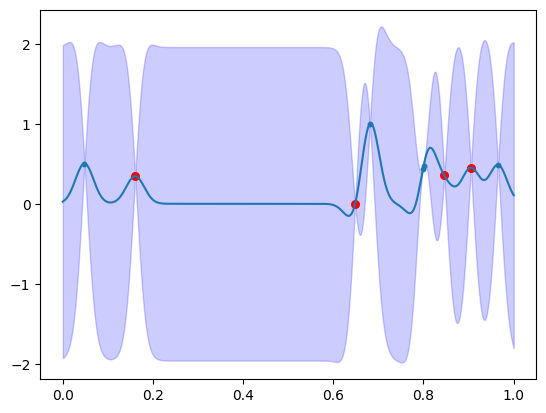

In [8]:
"""
Now select the next batch of X values using the acquisition function (not random) and update the optimiser.
"""

batch_size = 4

raw_X = bo.GetNextXBatch(batch_size=batch_size, sub_batch_size=1, max_kappa=max_kappa, min_kappa=min_kappa)
raw_Y = ObjectiveFunction(raw_X)
bo.UpdateData(raw_X, raw_Y)

BOPackage.SausagePlot(bo, highlight_recent=batch_size)



# candidate_x = X.reshape([len(X), 1])
# mean, variance = bo.PredictMeanVariance(candidate_x)

# plt.plot(X, mean)

# shifted_y_data = bo.y_data - np.min(bo.y_data)
# normalised_y_data = shifted_y_data / np.max(shifted_y_data)

# plt.scatter(bo.X_data[:5], normalised_y_data[:5], s=10)
# plt.scatter(bo.X_data[5:5+batch_size], normalised_y_data[5:5+batch_size], s=30)
# plt.fill_between(X, 
#                     mean - 1.96 * np.sqrt(variance), 
#                     mean + 1.96 * np.sqrt(variance), 
#                     color='blue', alpha=0.2, label='95% Confidence Interval'
#                     )



In [9]:
print(bo.X_data)

# bo.y_data = bo.y_data[:-1]

# print(bo.y_data)

[[0.04818123]
 [0.68096301]
 [0.79869607]
 [0.80010859]
 [0.96529725]
 [0.90497455]
 [0.84610052]
 [0.16061479]
 [0.6483207 ]]


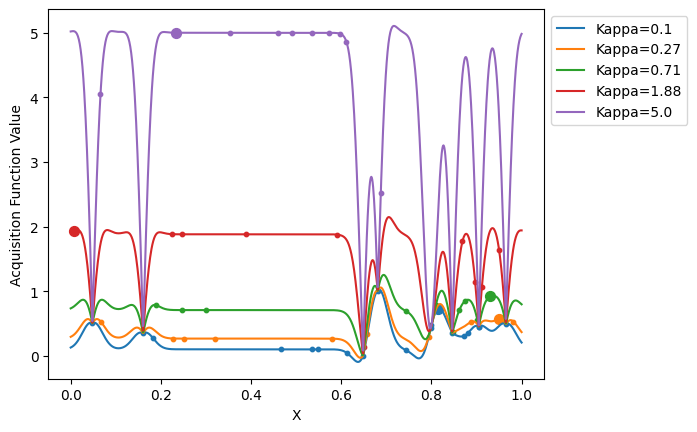

In [10]:
"""
Again lets looks at the acquisition function and how our next X set is selected.
"""
BOPackage.KappaAcquisitionFunctionPlot(bo, number_kappas=5, number_candidate_points=10, max_kappa=5, min_kappa=0.1)

# kappas = [min_kappa, min_kappa + (max_kappa - min_kappa) / 4, min_kappa + (max_kappa - min_kappa) / 2, min_kappa + 3 * (max_kappa - min_kappa) / 4, max_kappa]

# for i, kappa in enumerate(kappas):
#     full_acq_fn = bo.AcquisitionFunction(mean, np.sqrt(variance), kappa)

#     candidate_x = 
    
#     X_mean, X_variance = bo.PredictMeanVariance(candidate_x)
#     Y_acq_fn = bo.AcquisitionFunction(X_mean, np.sqrt(X_variance), kappa)

#     next_Y = np.max(Y_acq_fn)
#     next_X = candidate_x[np.argmax(Y_acq_fn)]

#     plt.plot(X, full_acq_fn, color=f'C{i}', alpha=0.5, label=f'kappa{i}')

#     plt.scatter(next_X, next_Y, color=f'C{i}')
#     plt.scatter(candidate_x, Y_acq_fn, color=f'C{i}', s=10)
#     plt.scatter(next_X, next_Y, color=f'C{i}', marker='x', s=20)

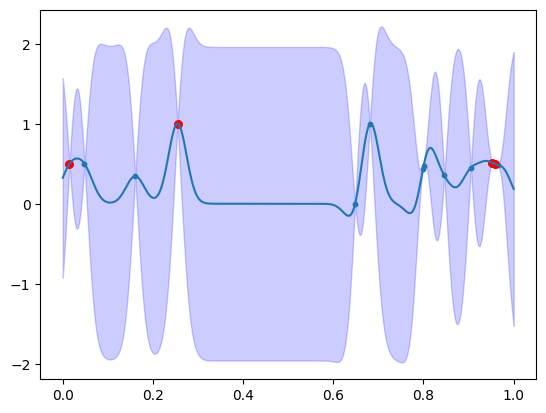

In [11]:
"""
Final example of doing this again.
"""
batch_size = 4

raw_X = bo.GetNextXBatch(batch_size=4, max_kappa=max_kappa, min_kappa=min_kappa)
raw_Y = ObjectiveFunction(raw_X)
bo.UpdateData(raw_X, raw_Y)

BOPackage.SausagePlot(bo, highlight_recent=batch_size)


# candidate_x = X.reshape([len(X), 1])
# mean, variance = bo.PredictMeanVariance(candidate_x)

# plt.plot(X, mean)

# shifted_y_data = bo.y_data - np.min(bo.y_data)
# normalised_y_data = shifted_y_data / np.max(shifted_y_data)

# plt.scatter(bo.X_data, normalised_y_data, s=10)
# plt.fill_between(X, 
#                     mean - 1.96 * np.sqrt(variance), 
#                     mean + 1.96 * np.sqrt(variance), 
#                     color='blue', alpha=0.2, label='95% Confidence Interval'
#                     )

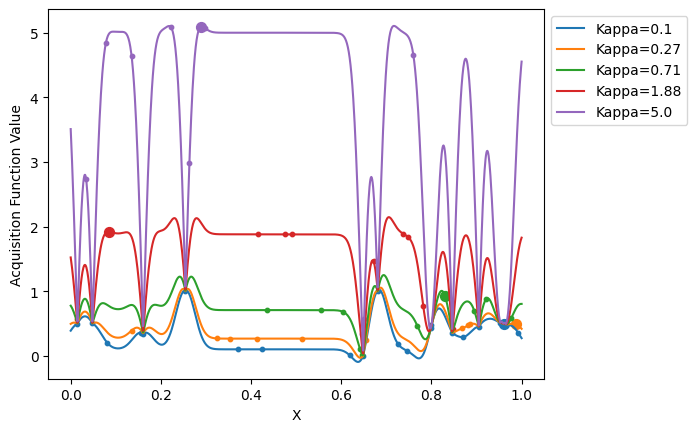

In [17]:
BOPackage.KappaAcquisitionFunctionPlot(bo, number_kappas=5, number_candidate_points=10, max_kappa=5, min_kappa=0.1)


# kappas = [min_kappa, min_kappa + (max_kappa - min_kappa) / 4, min_kappa + (max_kappa - min_kappa) / 2, min_kappa + 3 * (max_kappa - min_kappa) / 4, max_kappa]

# for i, kappa in enumerate(kappas):
#     full_acq_fn = bo.AcquisitionFunction(mean, np.sqrt(variance), kappa)

#     candidate_x = np.random.uniform(bo.bounds[:, 0], bo.bounds[:, 1], size=(bo.n_samples, bo.bounds.shape[0]))
#     X_mean, X_variance = bo.PredictMeanVariance(candidate_x)
#     Y_acq_fn = bo.AcquisitionFunction(X_mean, np.sqrt(X_variance), kappa)

#     next_Y = np.max(Y_acq_fn)
#     next_X = candidate_x[np.argmax(Y_acq_fn)]

#     plt.plot(X, full_acq_fn, color=f'C{i}', alpha=0.5, label=f'kappa{i}')

#     plt.scatter(next_X, next_Y, color=f'C{i}')
#     plt.scatter(candidate_x, Y_acq_fn, color=f'C{i}', s=10)
#     plt.scatter(next_X, next_Y, color=f'C{i}', marker='x', s=20)

In [ ]:
print(bo.y_data)
bo.SaveOptimisaer('/work4/clf/david/Bayesian/BayesianOptimiser/BO.pkl')

[  2.6996075  521.23785822 -71.03173622 -29.10723381 -12.82265745]


In [14]:
for i in range(20):
    raw_X = bo.GetNextXBatch(batch_size=4, sub_batch_size=1, max_kappa=10, min_kappa=0.1)
    raw_Y = ObjectiveFunction(raw_X)
    bo.UpdateData(raw_X, raw_Y)

print((f'Current best y value was {bo.BestData()[1][0]}; the corresponding X values were {bo.X_data[bo.BestData()[0][0]]}'))

[    2.6996075    521.23785822   -71.03173622   -29.10723381
  -718.78082537    83.10371384   -77.04006006    32.09871429
  -295.07345687   -30.66192158 -1209.2032716    718.49423103
     9.47532976    -3.13408714  -655.6410701    684.40541378
  -554.33351711     8.20571783  1851.60694105  -648.38037352
  -139.70291978  -232.72255615 -1797.77870496   -15.59303578
  -144.65320192   581.05909143   476.61596457   -58.79426111
   305.56056583   699.85251183 -1488.35099919   651.23274238
   378.81598557  -151.92547451    30.25760166  1998.86938629
   -42.63671946  -377.07203794  -281.37769547  1372.67420596
 -1595.81714935    31.85807703    83.32256918   354.47979744
    28.59651858  1320.20166586   220.48973322  1663.64610568
  -730.59383288 -1204.09724827   -19.87224857  1813.64844329
    -9.6616964   1375.15600587   335.93782319    23.96841153
  1196.19344379  -486.80865913   100.93816782     5.32785158
    31.81486916  1676.65791884  1844.30278278   879.54993525
    -3.16547071  1967.79